In [1]:
import numpy as np
import pandas as pd
import os
from scipy import io
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score 

## Prepare the data

In [3]:
set9 = io.loadmat('set9.mat')
set10 = io.loadmat('set10.mat')
set11 = io.loadmat('set11.mat')
set17 = io.loadmat('set17.mat')
set18 = io.loadmat('set18.mat')
set25 = io.loadmat('set25.mat')
set26 = io.loadmat('set26.mat')
set27 = io.loadmat('set27.mat')
set28 = io.loadmat('set28.mat')
set33 = io.loadmat('set33.mat')

voltage = np.concatenate((set9['V'].reshape(128), set10['V'].reshape(128), set11['V'].reshape(128), set17['V'].reshape(128), set18['V'].reshape(128), set25['V'].reshape(128),  set26['V'].reshape(128), set27['V'].reshape(128), set28['V'].reshape(128), set33['V'].reshape(128)))
current = np.concatenate((set9['C'].reshape(128), set10['C'].reshape(128), set11['C'].reshape(128), set17['C'].reshape(128), set18['C'].reshape(128), set25['C'].reshape(128),  set26['C'].reshape(128), set27['C'].reshape(128), set28['C'].reshape(128), set33['C'].reshape(128)))



In [5]:
set9str = "11010010110011001001010001101010101110111010100101000000010011100110110001011101010010010000001111000011001010010011000000000111"
set10str = "00100010010000101000111010100000100100100010000000001010100010011111111100001111000100000110100100100001001000110000100010000100"
set11str = "11010010110011001001010001101010101110111010100101000000010011100110110001011101010010010000001111000011001010010011000000000111"
set17str = "11110010111010011111101000001011110010101000000000001000010110000001111011110001011010111111011100101101100111001110101000101001"
set18str = "11001100110011001001010011010100100001000001101000010111010011001010000010001111010111101010001111100011010000100000110000000100"
set25str = "10101001010001001001011101110000000000011001000000110000010000010011001010101001101011001111000010110110100000000100001110101111"
set26str = "01011101011101000000000000000010010010111100001001101001000101101110000101100010101011000010001010101101101001100000111000011000"
set27str = "10010101111001110011101111101110100011011111110010000110110101111100000001111100010010010101010000101100001001001000011001110101"
set28str = "10110111001111011001010011100000100000100010011011011110011011100110100110010100001110101101011011000100101010100001000110000010"
set33str = "01111100000101001110111111110001010100101010110000000001011010001000000000011101000110000111100010010111100010100001010100010101"


In [6]:
def binstr(string):
    actual_bin = []
    for i in range(len(string)):
        if string[i] == '1':
            actual_bin.append(1)
        else:
            actual_bin.append(0)
    return actual_bin

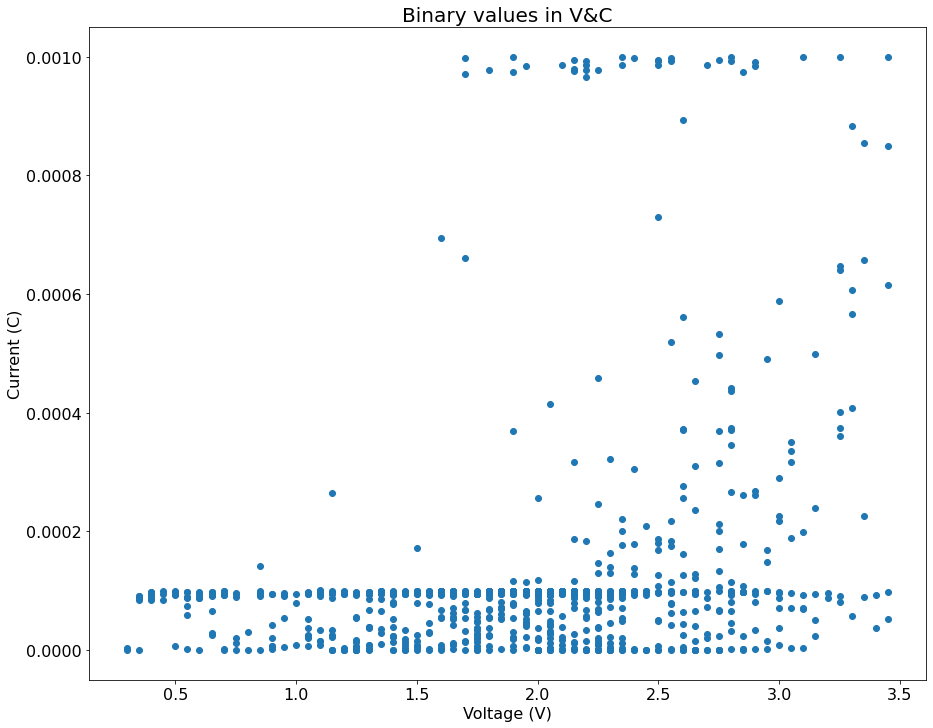

In [7]:

plt.figure(figsize=(15,12))
plt.scatter(voltage, current)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('Binary values in V&C', fontsize=20)

plt.xlabel('Voltage (V)',fontsize =16)
plt.ylabel('Current (C)',fontsize =16)

plt.show()

In [8]:
binary = np.concatenate((binstr(set9str), binstr(set10str), binstr(set11str), binstr(set17str), binstr(set18str), binstr(set25str),binstr(set26str), binstr(set27str), binstr(set28str), binstr(set33str)))

## Split the data

In [9]:
from sklearn.model_selection import train_test_split
X = np.column_stack((voltage, current))
y = binary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12345)

In [10]:
X_train.shape

(857, 2)

In [11]:
X_test.shape

(423, 2)

In [12]:
0.67+0.33

1.0

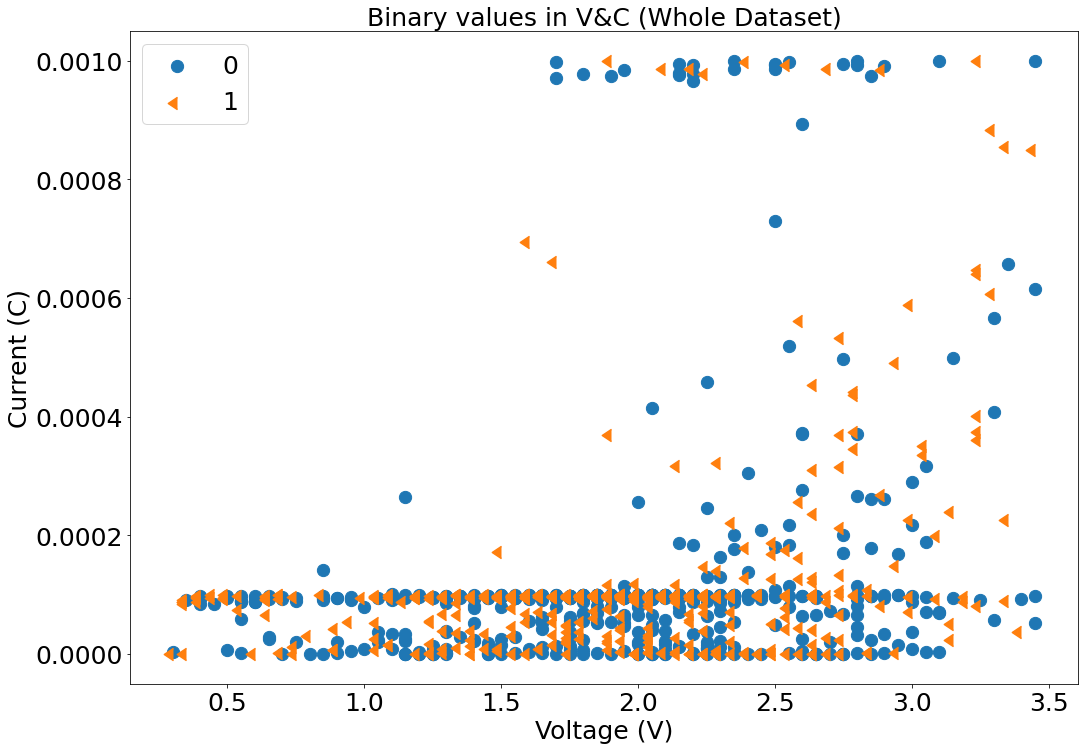

In [13]:

fig, ax = plt.subplots()
fig.set_size_inches(17, 12)

scatter_x = X[:,0]
scatter_y = X[:,1]
group = y
for g in np.unique(group):
    i = np.where(group == g)
    
    if g== 0:
        marker = 'o'
    else:
        marker = 8
    ax.scatter(scatter_x[i], scatter_y[i], label=g ,s=150, marker=marker)
    #ax.scatter(scatter_x[i], scatter_y[i], label=g ,s=150, marker=8)
    
plt.title('Binary values in V&C (Whole Dataset)', fontsize=25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.xlabel('Voltage (V)',fontsize =25)
plt.ylabel('Current (C)',fontsize =25)
ax.legend(fontsize=25)
plt.show()

In [14]:
X.shape

(1280, 2)

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
predictions = clf.predict(X_test)

In [17]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

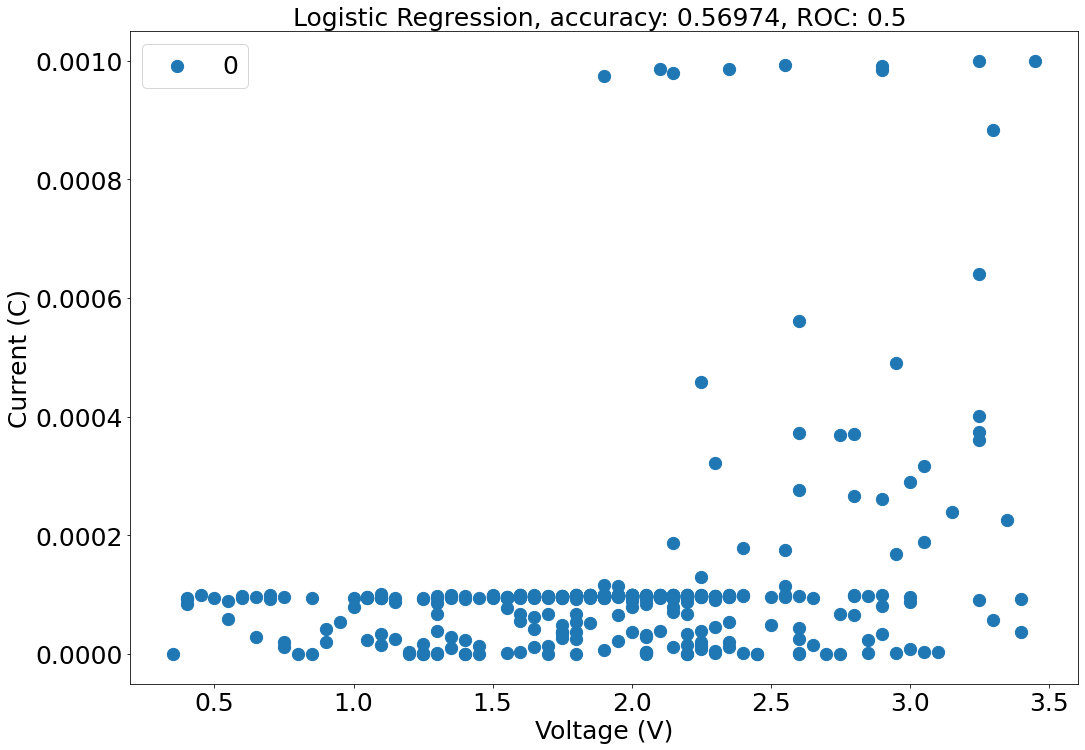

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 12)

scatter_x = X_test[:,0]
scatter_y = X_test[:,1]
group =  predictions


lr_accuracy = accuracy_score(predictions, y_test)
lr_roc = roc_auc_score(y_test, predictions)

for g in np.unique(group):
    i = np.where(group == g)
    if g== 0:
        marker = 'o'
    else:
        marker = 8
    
    
    ax.scatter(scatter_x[i], scatter_y[i], label=g, s=150, marker=marker)
plt.title(f'Logistic Regression, accuracy: {round(lr_accuracy,5)}, ROC: {round(lr_roc,5)} ', fontsize=25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.xlabel('Voltage (V)',fontsize =25)
plt.ylabel('Current (C)',fontsize =25)
ax.legend(fontsize=25)
plt.show()

## Kmeans

In [39]:
from sklearn.cluster import KMeans


In [40]:
X_cluster = np.column_stack((voltage, current))

In [41]:
kmeansP = KMeans(n_clusters=2, random_state=12454,verbose=0, init="k-means++").fit(X_train)


In [42]:
kmeans = KMeans(n_clusters=2, random_state=0,init='random').fit(X_train)


In [43]:
kmeansP = KMeans(n_clusters=2, random_state=12454,verbose=0, init="k-means++").fit(X_train)
kmeans = KMeans(n_clusters=2, random_state=0,init='random').fit(X_train)
predskp = kmeansP.predict(X_test)
predsk = kmeans.predict(X_test)

In [44]:
predskp = kmeansP.predict(X_test)
predsk = kmeans.predict(X_test)

In [45]:
kmeans_accuracy = accuracy_score(predsk, y_test)
kmeansP_accuracy = accuracy_score(predskp, y_test)
kmeans_roc =  roc_auc_score(y_test, predsk)
kmeansP_roc = roc_auc_score(y_test, predskp)

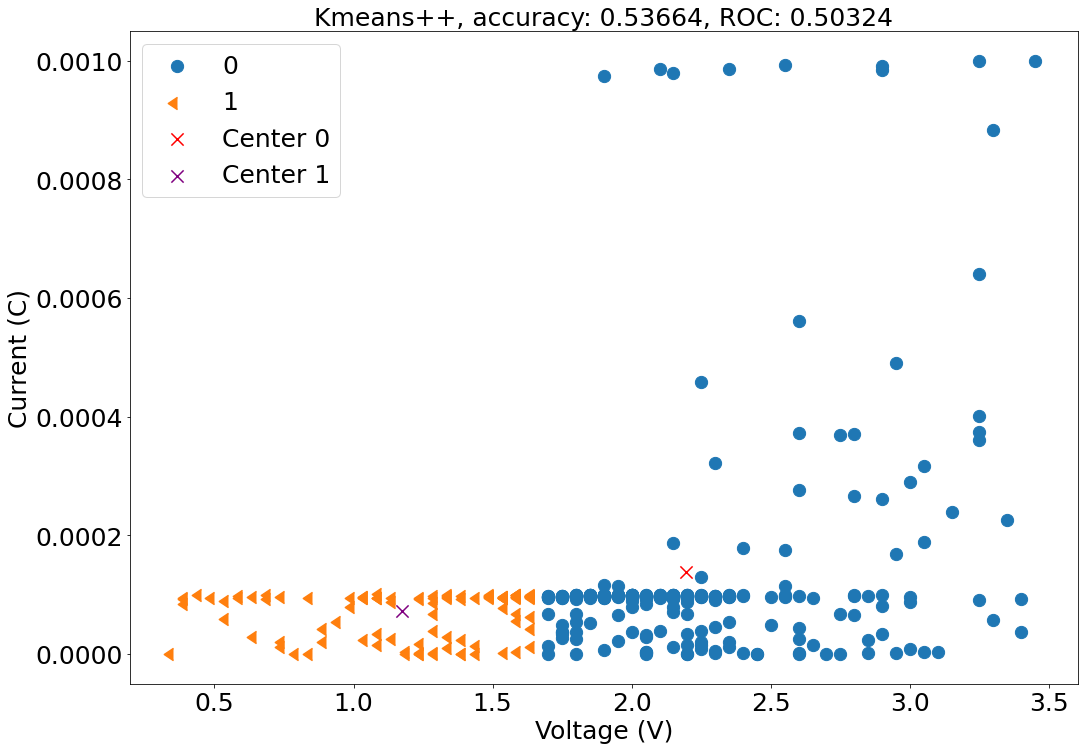

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 12)

scatter_x = X_test[:,0]
scatter_y = X_test[:,1]
group = predskp


for g in np.unique(group):
    i = np.where(group == g)
    
    if g== 0:
        marker = 'o'
    else:
        marker = 8
    ax.scatter(scatter_x[i], scatter_y[i], label=g,s=150, marker=marker)
plt.title(f'Kmeans++, accuracy: {round(kmeansP_accuracy,5)}, ROC: {round(kmeansP_roc,5)}', fontsize=25)
ax.scatter(kmeansP.cluster_centers_[0][0], kmeansP.cluster_centers_[0][1], label='Center 0', c='red', s=150,marker="x")
ax.scatter(kmeansP.cluster_centers_[1][0], kmeansP.cluster_centers_[1][1], label='Center 1', c='purple',s=150, marker="x")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.xlabel('Voltage (V)',fontsize =25)
plt.ylabel('Current (C)',fontsize =25)
ax.legend(fontsize=25)
plt.show()

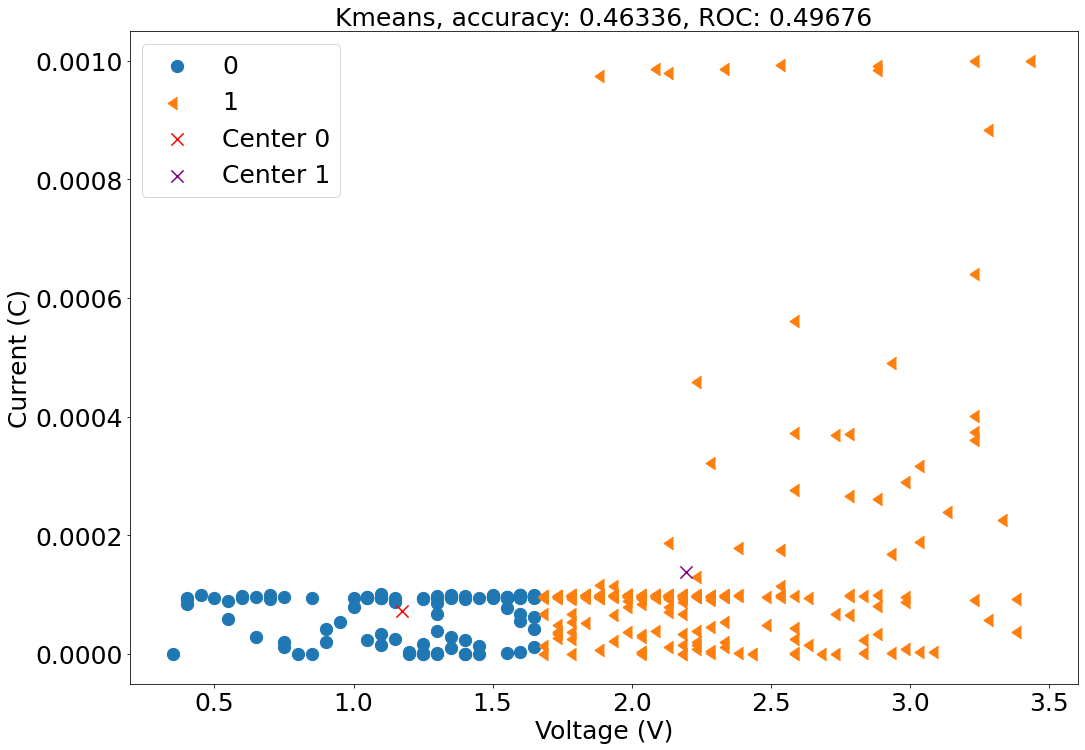

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 12)

scatter_x = X_test[:,0]
scatter_y = X_test[:,1]
group = predsk


for g in np.unique(group):
    i = np.where(group == g)
    
    if g== 0:
        marker = 'o'
    else:
        marker = 8
    
    ax.scatter(scatter_x[i], scatter_y[i], label=g, s=150, marker=marker)
    
ax.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], label='Center 0', c='red', s=150,marker="x")
ax.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], label='Center 1', c='purple',s=150, marker="x")
plt.title(f'Kmeans, accuracy: {round(kmeans_accuracy,5)}, ROC: {round(kmeans_roc,5)}', fontsize=25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.xlabel('Voltage (V)',fontsize =25)
plt.ylabel('Current (C)',fontsize =25)
ax.legend(fontsize=25)
plt.show()

## Gaussian Mixture Model

In [48]:
from sklearn.mixture import GaussianMixture

In [49]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X_train)

In [50]:
gm.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [51]:
print(f'GMM accuracy: {accuracy_score(gm.predict(X_test), y_test)}')

GMM accuracy: 0.44208037825059104


In [52]:
gm_accuracy = accuracy_score(gm.predict(X_test), y_test)
gm_roc = roc_auc_score(y_test, gm.predict(X_test))

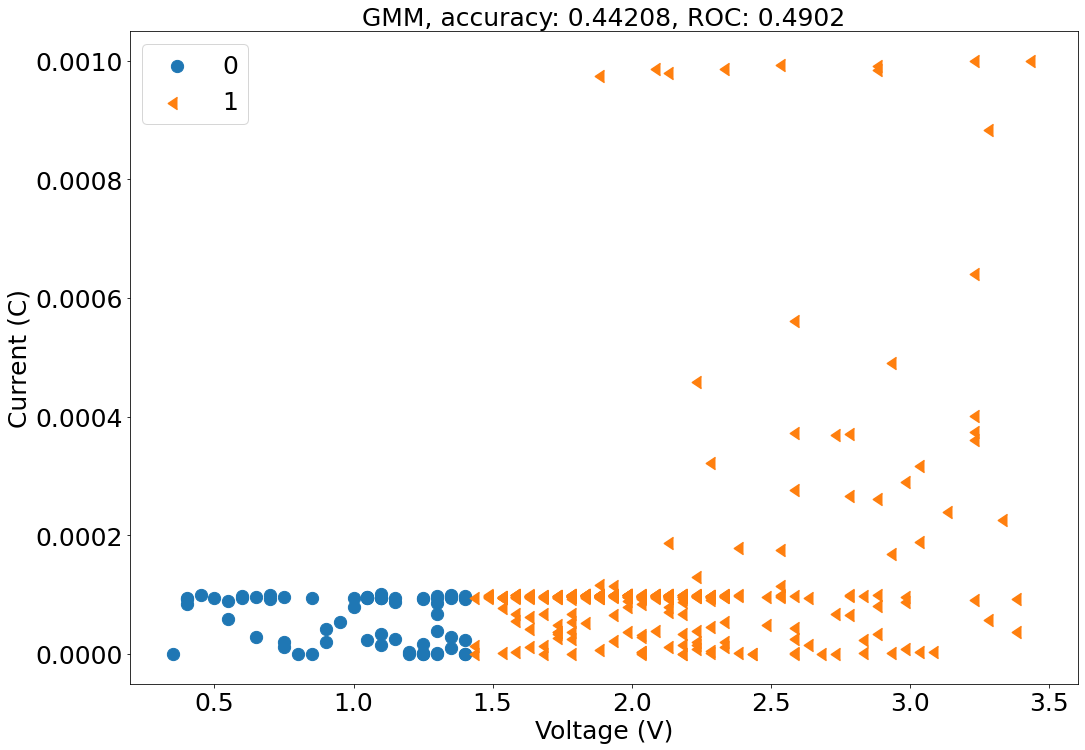

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 12)

scatter_x = X_test[:,0]
scatter_y = X_test[:,1]
group = gm.predict(X_test)


for g in np.unique(group):
    i = np.where(group == g)
    
    if g== 0:
        marker = 'o'
    else:
        marker = 8
        
    ax.scatter(scatter_x[i], scatter_y[i], label=g, s=150, marker=marker)
plt.title(f'GMM, accuracy: {round(gm_accuracy,5)}, ROC: {round(gm_roc,5)}', fontsize=25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.xlabel('Voltage (V)',fontsize =25)
plt.ylabel('Current (C)',fontsize =25)
ax.legend(fontsize=25)
plt.show()

## SVM


In [54]:
from sklearn import svm

In [55]:
svm = svm.SVC(kernel='sigmoid',degree= 15, C=1).fit(X_train, y_train)

In [56]:
kernel = "Sigmoid"

In [57]:
svm.predict(X_test)
svm_accuracy = accuracy_score(svm.predict(X_test), y_test)
svm_roc = roc_auc_score(y_test, svm.predict(X_test))

In [58]:
svm_roc

0.5293534266563312

In [59]:
svm.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,

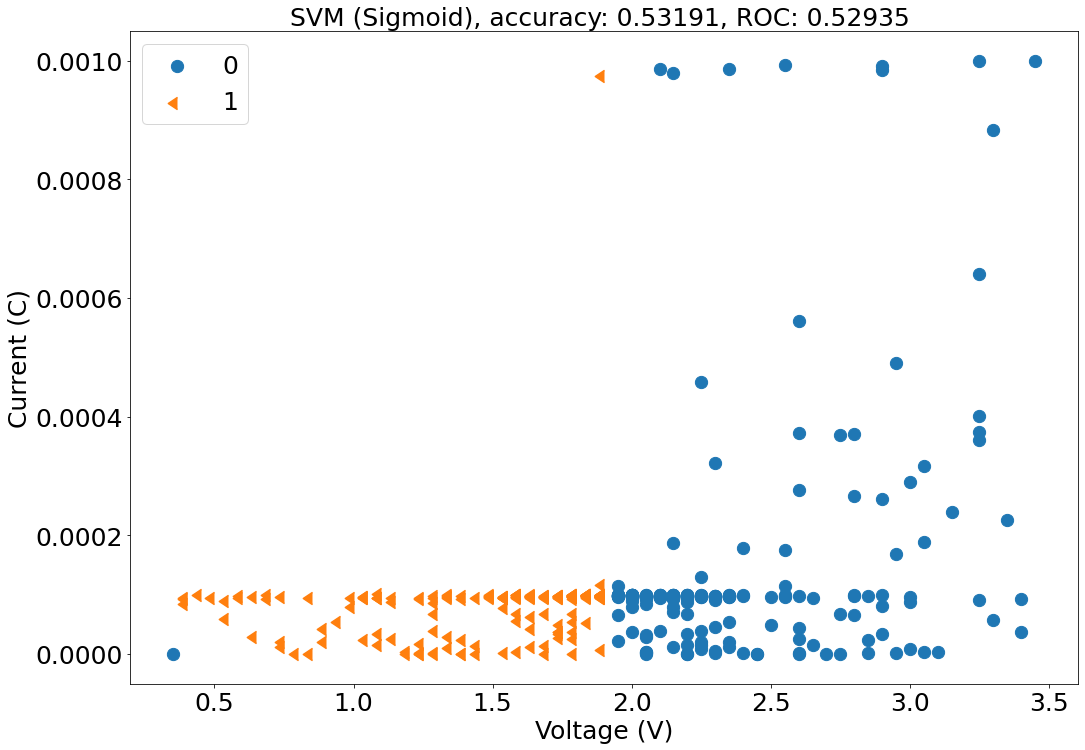

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 12)

scatter_x = X_test[:,0]
scatter_y = X_test[:,1]
group = svm.predict(X_test)


for g in np.unique(group):
    i = np.where(group == g)
    
    if g== 0:
        marker = 'o'
    else:
        marker = 8
    
    ax.scatter(scatter_x[i], scatter_y[i], label=g, s=150, marker=marker)
plt.title(f'SVM ({kernel}), accuracy: {round(svm_accuracy,5)}, ROC: {round(svm_roc,5)} ', fontsize=25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.xlabel('Voltage (V)',fontsize =25)
plt.ylabel('Current (C)',fontsize =25)
ax.legend(fontsize=25)
plt.show()

## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
nes = [100, 200, 400, 800, 1600]
depth = [5,10, 15, 25, 40]

results = {}

for n in nes:
    results [n] = []
    #results[n].append([0,0.5,0.47])
    for d in depth:   
    
        clf = RandomForestClassifier(max_depth=d, n_estimators=n, random_state=0).fit(X_train, y_train)
        rt_accuracy = accuracy_score(clf.predict(X_test), y_test)
        rt_roc = roc_auc_score(y_test, clf.predict(X_test))
        results[n].append([d, rt_accuracy, rt_roc])
        
        print(f'Random Forest ({n} estimators, {d} depth), accuracy: {round(rt_accuracy,5)}, ROC: {round(rt_roc,5)}')
    

Random Forest (100 estimators, 5 depth), accuracy: 0.55556, ROC: 0.49966
Random Forest (100 estimators, 10 depth), accuracy: 0.54374, ROC: 0.50812
Random Forest (100 estimators, 15 depth), accuracy: 0.5461, ROC: 0.52162
Random Forest (100 estimators, 25 depth), accuracy: 0.53901, ROC: 0.52213
Random Forest (100 estimators, 40 depth), accuracy: 0.53664, ROC: 0.52072
Random Forest (200 estimators, 5 depth), accuracy: 0.55792, ROC: 0.49972
Random Forest (200 estimators, 10 depth), accuracy: 0.54137, ROC: 0.5047
Random Forest (200 estimators, 15 depth), accuracy: 0.53428, ROC: 0.51058
Random Forest (200 estimators, 25 depth), accuracy: 0.52955, ROC: 0.51248
Random Forest (200 estimators, 40 depth), accuracy: 0.52009, ROC: 0.50284
Random Forest (400 estimators, 5 depth), accuracy: 0.54846, ROC: 0.49142
Random Forest (400 estimators, 10 depth), accuracy: 0.56501, ROC: 0.52881
Random Forest (400 estimators, 15 depth), accuracy: 0.54374, ROC: 0.5209
Random Forest (400 estimators, 25 depth), ac

In [63]:
results

{100: [[5, 0.5555555555555556, 0.49965801833021756],
  [10, 0.5437352245862884, 0.508116364962838],
  [15, 0.5460992907801419, 0.5216246409192468],
  [25, 0.5390070921985816, 0.5221262140349276],
  [40, 0.5366430260047281, 0.5207240891888194]],
 200: [[5, 0.557919621749409, 0.4997150152751812],
  [10, 0.541371158392435, 0.504696548265013],
  [15, 0.5342789598108747, 0.5105786329852721],
  [25, 0.5295508274231678, 0.5124823309470612],
  [40, 0.5200945626477541, 0.5028384478591947]],
 400: [[5, 0.5484633569739953, 0.49141626008845923],
  [10, 0.5650118203309693, 0.5288062559846792],
  [15, 0.5437352245862884, 0.5208950800237108],
  [25, 0.5295508274231678, 0.5124823309470612],
  [40, 0.5271867612293144, 0.5117527700515252]],
 800: [[5, 0.5555555555555556, 0.4976403264785007],
  [10, 0.5650118203309693, 0.5274611280835347],
  [15, 0.5437352245862884, 0.5208950800237108],
  [25, 0.5319148936170213, 0.5152295836943139],
  [40, 0.5366430260047281, 0.5200515252382472]],
 1600: [[5, 0.55555555

In [64]:
res100 = np.array(results[100])
res200 = np.array(results[200])
res400 = np.array(results[400])
res800 = np.array(results[800])
res1600 = np.array(results[1600])


In [65]:
np.array(results[100])[:,1]

array([0.55555556, 0.54373522, 0.54609929, 0.53900709, 0.53664303])

In [66]:
res100[:,1],

(array([0.55555556, 0.54373522, 0.54609929, 0.53900709, 0.53664303]),)

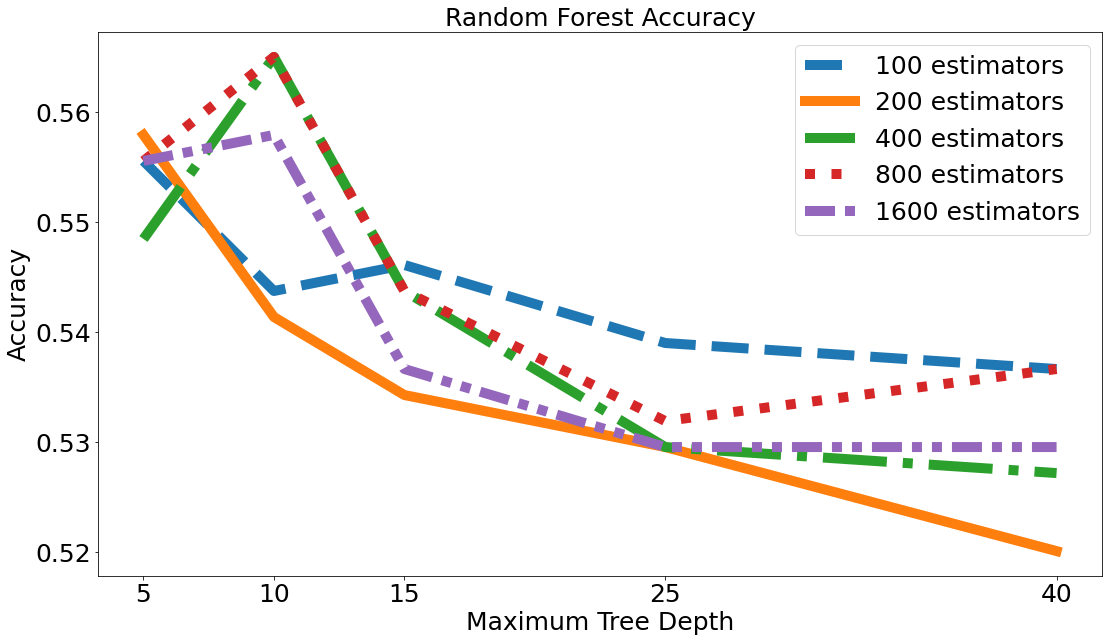

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
plt.plot(res100[:,0], res100[:,1], label='100 estimators', lw= 10, ls="--")
plt.plot(res200[:,0], res200[:,1], label='200 estimators',lw= 10, ls="-")
plt.plot(res400[:,0], res400[:,1], label='400 estimators', lw= 10, ls="-.")
plt.plot(res800[:,0], res800[:,1], label='800 estimators', lw= 10, ls=":")
plt.plot(res1600[:,0], res1600[:,1], label='1600 estimators', lw=10, ls=(0, (3, 1, 1, 1, 1, 1)))

plt.xticks(res100[:,0],fontsize=25)
plt.yticks(fontsize=25)

plt.title("Random Forest Accuracy", fontsize=25)

plt.ylabel('Accuracy',fontsize =25)
plt.xlabel('Maximum Tree Depth',fontsize =25)
ax.legend(fontsize=25)
plt.show()

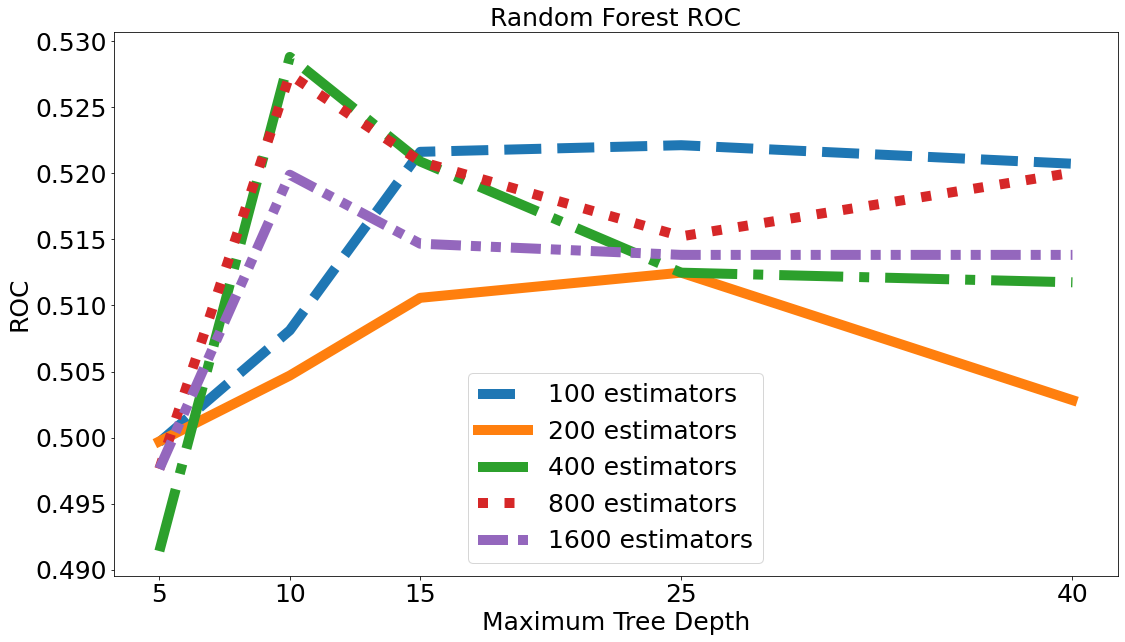

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
plt.plot(res100[:,0], res100[:,2], label='100 estimators', lw= 10, ls="--")
plt.plot(res200[:,0], res200[:,2], label='200 estimators',lw= 10, ls="-")
plt.plot(res400[:,0], res400[:,2], label='400 estimators', lw= 10, ls="-.")
plt.plot(res800[:,0], res800[:,2], label='800 estimators', lw= 10, ls=":")
plt.plot(res1600[:,0], res1600[:,2], label='1600 estimators', lw=10, ls=(0, (3, 1, 1, 1, 1, 1)))

plt.xticks(res100[:,0],fontsize=25)
plt.yticks(fontsize=25)

plt.title("Random Forest ROC", fontsize=25)

plt.ylabel('ROC',fontsize =25)
plt.xlabel('Maximum Tree Depth',fontsize =25)
ax.legend(fontsize=25)
plt.show()

In [69]:
clf = RandomForestClassifier(max_depth=10, n_estimators=400, random_state=0)
clf.fit(X_train, y_train)
#100 200 400 800 1600

#depth 5,10, 15, 25, 40 


RandomForestClassifier(max_depth=10, n_estimators=400, random_state=0)

In [70]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,

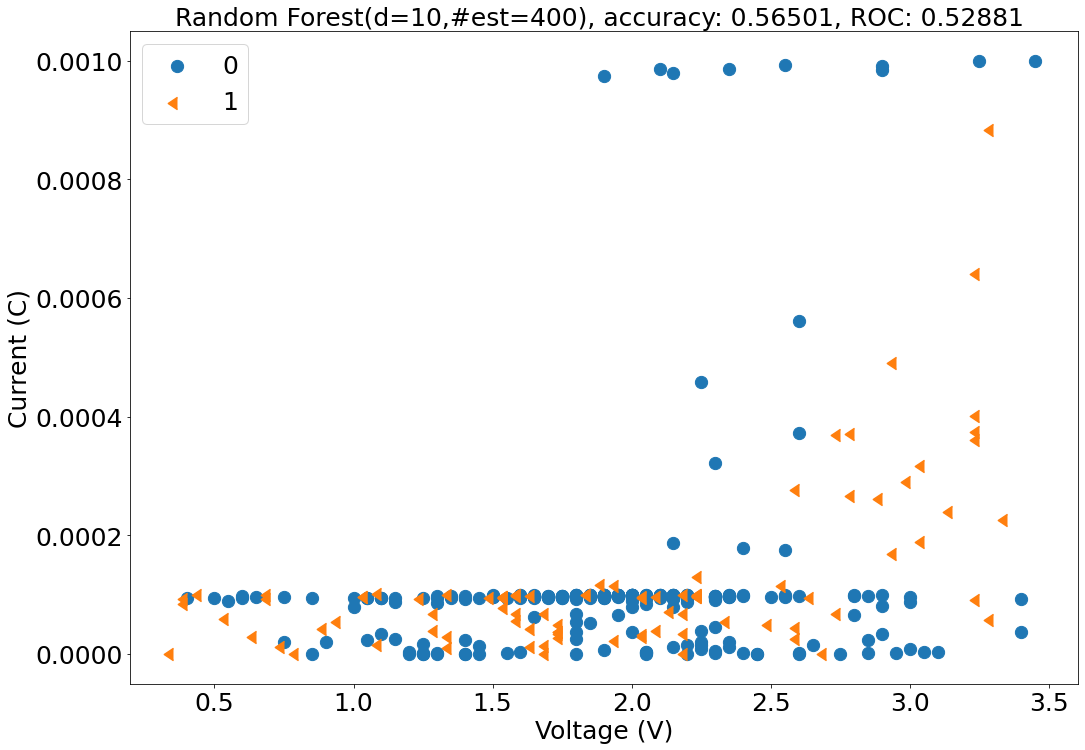

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 12)

scatter_x = X_test[:,0]
scatter_y = X_test[:,1]
group = clf.predict(X_test)

rt_accuracy = accuracy_score(clf.predict(X_test), y_test)
rt_roc = roc_auc_score(y_test, clf.predict(X_test))


for g in np.unique(group):
    i = np.where(group == g)
    
    if g== 0:
        marker = 'o'
    else:
        marker = 8
    
    ax.scatter(scatter_x[i], scatter_y[i], label=g, s=150, marker=marker)
plt.title(f'Random Forest(d={10},#est={400}), accuracy: {round(rt_accuracy,5)}, ROC: {round(rt_roc,5)} ', fontsize=25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.xlabel('Voltage (V)',fontsize =25)
plt.ylabel('Current (C)',fontsize =25)
ax.legend(fontsize=25)
plt.show()

## XGBoost

In [72]:
import xgboost as xgb   

/Users/gosha/miniconda3/envs/resenv/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [73]:
xgb_results = {}

for n in nes:
    
    xgb_results [n] = []
    
    for d in depth:
        
        clf = xgb.XGBClassifier(max_depth=d, n_estimators=n, random_state=0, use_label_encoder=False,verbosity=0).fit(X_train, y_train)
        rt_accuracy = accuracy_score(clf.predict(X_test), y_test)
        rt_roc = roc_auc_score(y_test, clf.predict(X_test))
        xgb_results[n].append([d, rt_accuracy, rt_roc])
        print(f'XGB ({n} estimators,  {d} depth), accuracy: {round(rt_accuracy,5)}, ROC: {round(rt_roc,5)}')    
        
    
    
    
    

XGB (100 estimators,  5 depth), accuracy: 0.52009, ROC: 0.50755
XGB (100 estimators,  10 depth), accuracy: 0.54137, ROC: 0.52622
XGB (100 estimators,  15 depth), accuracy: 0.52955, ROC: 0.51652
XGB (100 estimators,  25 depth), accuracy: 0.54846, ROC: 0.53379
XGB (100 estimators,  40 depth), accuracy: 0.5461, ROC: 0.53239
XGB (200 estimators,  5 depth), accuracy: 0.53428, ROC: 0.51999
XGB (200 estimators,  10 depth), accuracy: 0.53191, ROC: 0.51994
XGB (200 estimators,  15 depth), accuracy: 0.52719, ROC: 0.51512
XGB (200 estimators,  25 depth), accuracy: 0.53901, ROC: 0.52683
XGB (200 estimators,  40 depth), accuracy: 0.53901, ROC: 0.52482
XGB (400 estimators,  5 depth), accuracy: 0.52246, ROC: 0.50895
XGB (400 estimators,  10 depth), accuracy: 0.53191, ROC: 0.51994
XGB (400 estimators,  15 depth), accuracy: 0.53191, ROC: 0.51926
XGB (400 estimators,  25 depth), accuracy: 0.53428, ROC: 0.52201
XGB (400 estimators,  40 depth), accuracy: 0.53428, ROC: 0.52134
XGB (800 estimators,  5 depth

In [74]:
xgb_res100 = np.array(xgb_results[100])
xgb_res200 = np.array(xgb_results[200])
xgb_res400 = np.array(xgb_results[400])
xgb_res800 = np.array(xgb_results[800])
xgb_res1600 = np.array(xgb_results[1600])

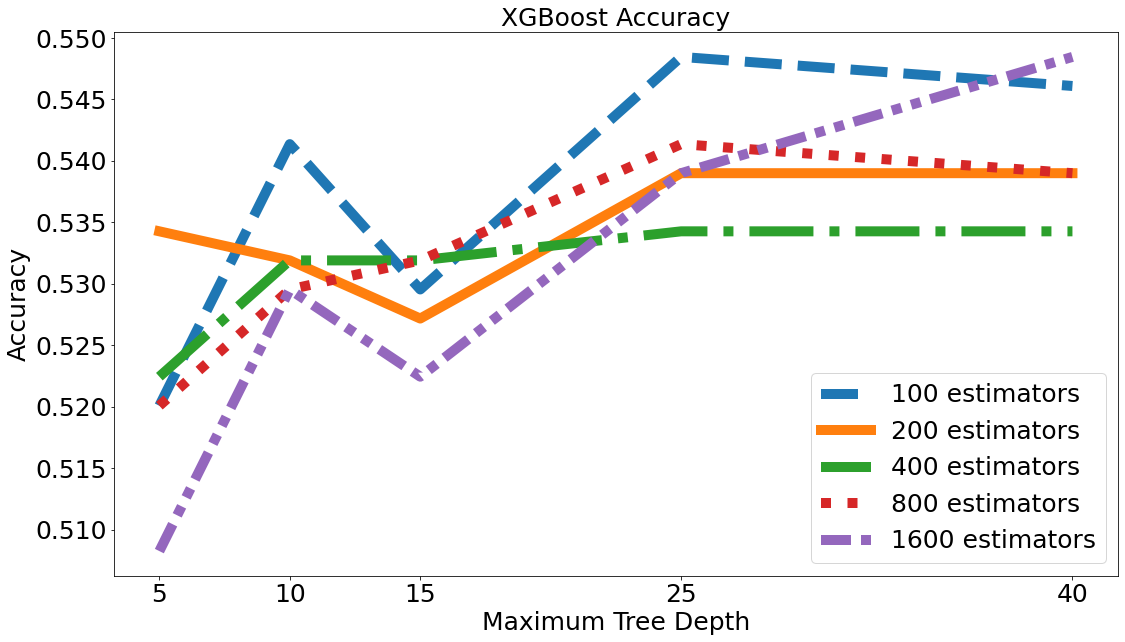

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
plt.plot(xgb_res100[:,0], xgb_res100[:,1], label='100 estimators', lw= 10, ls="--")
plt.plot(xgb_res200[:,0], xgb_res200[:,1], label='200 estimators',lw= 10, ls="-")
plt.plot(xgb_res400[:,0], xgb_res400[:,1], label='400 estimators', lw= 10, ls="-.")
plt.plot(xgb_res800[:,0], xgb_res800[:,1], label='800 estimators', lw= 10, ls=":")
plt.plot(xgb_res1600[:,0], xgb_res1600[:,1], label='1600 estimators', lw=10, ls=(0, (3, 1, 1, 1, 1, 1)))

plt.xticks(xgb_res100[:,0],fontsize=25)
plt.yticks(fontsize=25)

plt.title("XGBoost Accuracy", fontsize=25)

plt.ylabel('Accuracy',fontsize =25)
plt.xlabel('Maximum Tree Depth',fontsize =25)
ax.legend(fontsize=25)
plt.show()

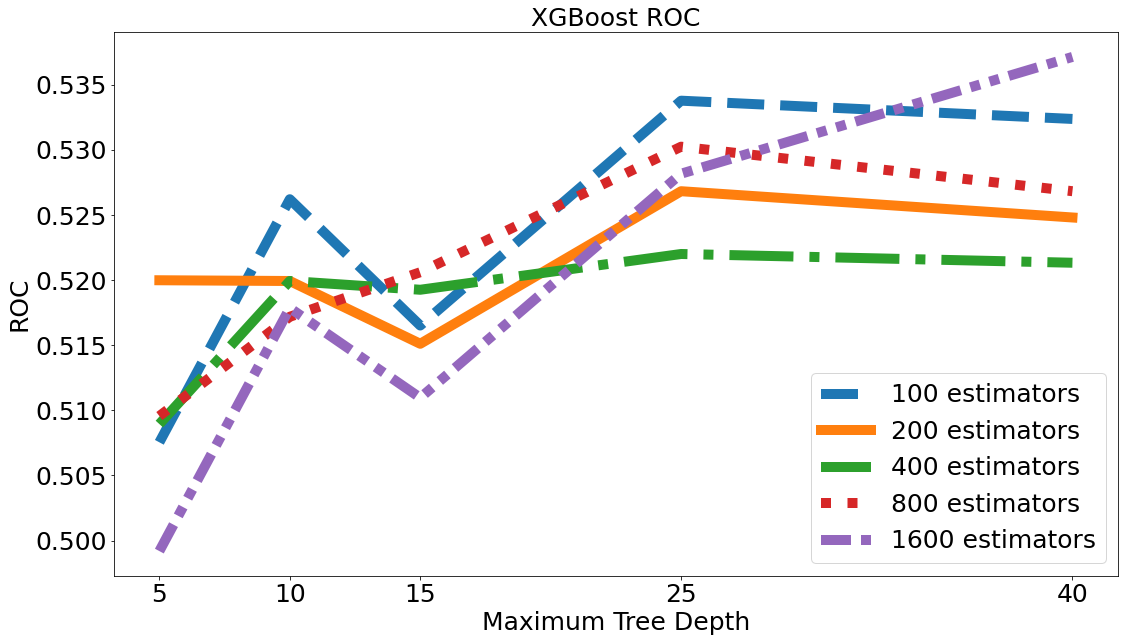

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
plt.plot(xgb_res100[:,0], xgb_res100[:,2], label='100 estimators', lw= 10, ls="--")
plt.plot(xgb_res200[:,0], xgb_res200[:,2], label='200 estimators',lw= 10, ls="-")
plt.plot(xgb_res400[:,0], xgb_res400[:,2], label='400 estimators', lw= 10, ls="-.")
plt.plot(xgb_res800[:,0], xgb_res800[:,2], label='800 estimators', lw= 10, ls=":")
plt.plot(xgb_res1600[:,0], xgb_res1600[:,2], label='1600 estimators', lw=10, ls = (0, (3, 1, 1, 1, 1, 1)))

plt.xticks(xgb_res100[:,0],fontsize=25)
plt.yticks(fontsize=25)

plt.title("XGBoost ROC", fontsize=25)

plt.ylabel('ROC',fontsize =25)
plt.xlabel('Maximum Tree Depth',fontsize =25)
ax.legend(fontsize=25)
plt.show()

In [77]:
clf = xgb.XGBClassifier(max_depth=40, n_estimators=1600, random_state=0, use_label_encoder=False,verbosity=0).fit(X_train, y_train)

In [53]:
xgb_accuracy = accuracy_score(clf.predict(X_test), y_test)
xgb_roc = roc_auc_score(y_test, clf.predict(X_test))
predictions = clf.predict(X_test)

In [54]:
predictions 

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,

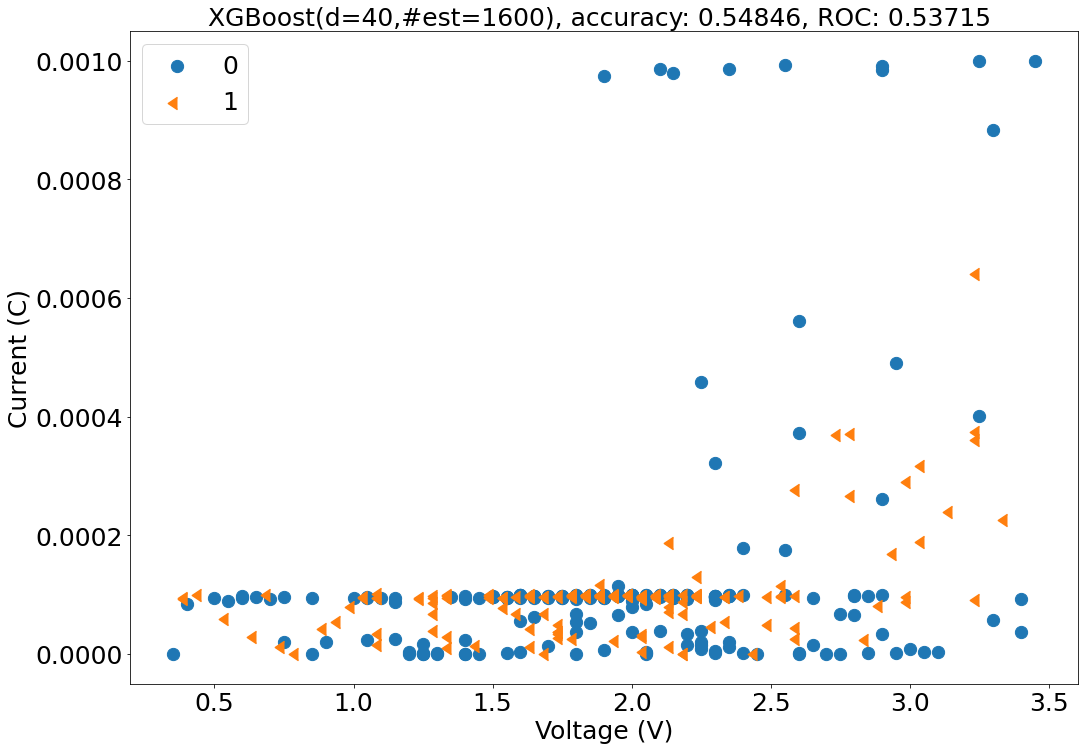

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 12)

scatter_x = X_test[:,0]
scatter_y = X_test[:,1]

group = predictions
xgb_accuracy = accuracy_score(predictions, y_test)
xgb_roc = roc_auc_score(y_test, predictions)

for g in np.unique(group):
    i = np.where(group == g)
    
    if g== 0:
        marker = 'o'
    else:
        marker = 8
    
    ax.scatter(scatter_x[i], scatter_y[i], label=g , s=150, marker=marker)
plt.title(f'XGBoost(d={40},#est={1600}), accuracy: {round(xgb_accuracy,5)}, ROC: {round(xgb_roc,5)} ', fontsize=25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.xlabel('Voltage (V)',fontsize =25)
plt.ylabel('Current (C)',fontsize =25)
ax.legend(fontsize=25)
plt.show()